# Graphs

Graphing data...

In [125]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [126]:
crabs = np.loadtxt('data/crab.tsv', delimiter='\t')
crocs = np.loadtxt('data/croc.tsv', delimiter='\t')
goos = np.loadtxt('data/goo.tsv', delimiter='\t')
snakes = np.loadtxt('data/snake.tsv', delimiter='\t')

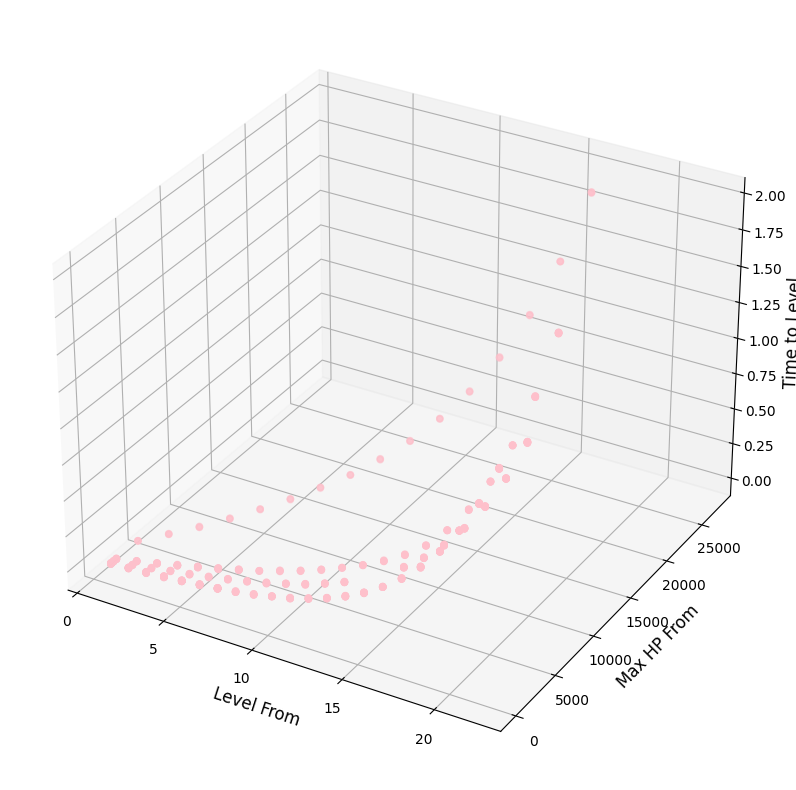

In [134]:
graph = plt.figure()
graph.set_figwidth(40)
graph.set_figheight(10)
ax = plt.axes(projection='3d')
ax.set_xlabel('Level From', fontsize=12)
ax.set_ylabel('Max HP From', fontsize=12)
ax.set_zlabel('Time to Level', fontsize=12)

X1 = np.concatenate((crabs[:, 1], crocs[:, 1], goos[:, 1], snakes[:, 1]))
X2 = np.concatenate((crabs[:, 3], crocs[:, 3], goos[:, 3], snakes[:, 3]))
Y = np.concatenate((crabs[:, 0], crocs[:, 0], goos[:, 0], snakes[:, 0]))

ax.scatter3D(crabs[:, 1], crabs[:, 3], crabs[:, 0], color='red')
ax.scatter3D(crocs[:, 1], crocs[:, 3], crocs[:, 0], color='darkgreen')
ax.scatter3D(goos[:, 1], goos[:, 3], goos[:, 0], color='limegreen')
ax.scatter3D(snakes[:, 1], snakes[:, 3], snakes[:, 0], color='green')

plt.show()

In [128]:
def f(X, a, b, c, d, e, f, g):
    level, hp = X
    return a + (b * level) + (c * (level ** 2)) + (d * hp) + (e * (hp ** 2)) + (f ** level) + (g ** hp)

popt, pcov = curve_fit(f, (goos[:, 1], goos[:, 3]), goos[:, 0])

C:\Users\Hyprk\AppData\Local\Temp\ipykernel_14104\3916801102.py:3: RuntimeWarning: overflow encountered in power
  return a + (b * level) + (c * (level ** 2)) + (d * hp) + (e * (hp ** 2)) + (f ** level) + (g ** hp)


In [129]:
popt

array([ 8.42502521e+05, -1.52136473e+05,  1.54634704e+04, -2.53522301e+03,
        5.63468173e+00,  1.91850852e+00,  1.01315745e+00])

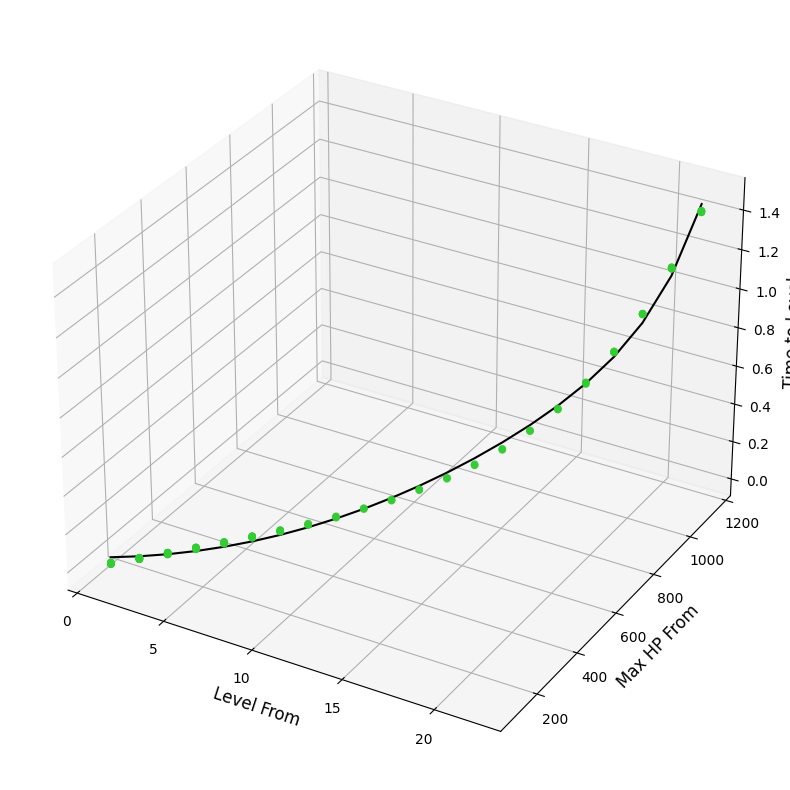

In [130]:
graph = plt.figure()
graph.set_figwidth(40)
graph.set_figheight(10)
ax = plt.axes(projection='3d')
ax.set_xlabel('Level From', fontsize=12)
ax.set_ylabel('Max HP From', fontsize=12)
ax.set_zlabel('Time to Level', fontsize=12)

ax.scatter3D(goos[:, 1], goos[:, 3], goos[:, 0], color='limegreen')

ax.plot3D(goos[:, 1], goos[:, 3], f((goos[:,1], goos[:,3]), popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6]), color='black')

plt.show()

In [131]:
print(f"{popt[0]} + ({popt[1]} * level) + ({popt[2]} * (level ** 2)) + ({popt[3]} * hp) + ({popt[4]} * (hp ** 2)) + ({popt[5]} ** level) + ({popt[6]} ** hp)")

842502.5208705318 + (-152136.4726385418 * level) + (15463.470396603105 * (level ** 2)) + (-2535.2230068682547 * hp) + (5.634681728406494 * (hp ** 2)) + (1.9185085240879203 ** level) + (1.0131574453935308 ** hp)
